<img height="180px" src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" align="left" hspace="30px" vspace="50px"/>

# Welcome to your next notebook with SDA!

During the classes we will mostly use [Google Colaboratory](https://colab.research.google.com/?hl=en) which is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

However, for bigger projects, especially involving Deep Learning and/or big data reading, it might be a better choice to setup Jupyter Notebook or Jupyter Lab on your computer. Also, it is worth noticing that there is a great number of useful extensions (see [nbextensions](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/index.html) and [jupyter-labextension](https://jupyterlab.readthedocs.io/en/stable/user/extensions.html)) not available for Colab users.

<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>

# Exploratory Data Analysis
## Data Cleaning and Preparation

Data understanding - collecting specific data needed to perform the following tasks:
* solve the problem
* provide data description (sometimes also labeling),
* exploration and quality verification.

Data types - `.csv` sheets (these are the ones we will be working on today), text, image, sound, video, weather data, stock data, public archives, etc.

The most important task - FEATURE EXTRACTION (feature engineering). A lot depends on the size of the set and the number of features - depending on these parameters, we will take different steps in the data analysis process.

#### **<font color='#306998'>Download </font><font color='#ffd33b'>chipotle.csv</font>**

Download `chipotle.tsv` file from the following kaggle site:
https://www.kaggle.com/datasets/navneethc/chipotle

Upload it to your Google Drive, mount it and load the data.

*Hint: you can copy the path to the file or change the working directory and then use just the file name with .tsv extenstion.*

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd

In [2]:
chipotle = pd.read_csv("../dane/chipotle.tsv", sep="\t")
chipotle

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [3]:
chipotle['item_price [$]'] = chipotle["item_price"].str.replace("$", "", regex=False).astype(float)
chipotle = chipotle.drop(columns=["item_price"])
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price [$]
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [5]:
# chipotle["item_price"][1]

In [6]:
# chipotle.replace("$3.39 ", 0)

### Dealing with missing data

Missing data is a fairly common problem faced by Data Analysts and Data Scientist. There are two main approaches:
* `df.dropna()` method - removes all rows with empty data from the table
* `df.fillna(value)` method- fills (or imputes) the data with the specified value

Later on you will also know some more advanced methods to impute missing data. What are your thoughts? What number should be given to the `<value>` to fill in missing observations?

In [7]:
chipotle.isna().sum()

,0
order_id,0
quantity,0
item_name,0
choice_description,1246
item_price [$],0


In [8]:
chipotle['choice_description'].fillna("No description")

,choice_description
0,No description
1,[Clementine]
2,[Apple]
3,No description
4,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans..."
...,...
4617,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ..."
4618,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese..."
4619,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto..."
4620,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu..."


Incomplete values - how to deal with them:
* ignore them
* insert the value "unknown"
* manually fill in on the basis of accumulated knowledge
* delete records with incomplete data
* complete algorithmically
    * look for the nearest neighbor
    * take the average
    * insert random values
    * create ML algorithm

In [9]:
threshold = 0.2

chipotle.columns[chipotle.isnull().mean() > threshold]

Index(['choice_description'], dtype='object')

In [10]:
# drop columns with more than 20% of missing data
chipotle[chipotle.columns[chipotle.isnull().mean() <= threshold]]

,order_id,quantity,item_name,item_price [$]
0,1,1,Chips and Fresh Tomato Salsa,2.39
1,1,1,Izze,3.39
2,1,1,Nantucket Nectar,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,2.39
4,2,2,Chicken Bowl,16.98
...,...,...,...,...
4617,1833,1,Steak Burrito,11.75
4618,1833,1,Steak Burrito,11.75
4619,1834,1,Chicken Salad Bowl,11.25
4620,1834,1,Chicken Salad Bowl,8.75


In [11]:
# drop rows with at least 20% of missing data (here one value)
chipotle.loc[chipotle.isnull().mean(axis=1) < threshold]

,order_id,quantity,item_name,choice_description,item_price [$]
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


Artificially, generate more missing values:

In [12]:
import numpy as np

chipotle['item_price [$]'] = chipotle['item_price [$]'].replace(8.75, np.NaN)

In [13]:
chipotle.isna().sum()

,0
order_id,0
quantity,0
item_name,0
choice_description,1246
item_price [$],730


In [14]:
chipotle.fillna(0)

,order_id,quantity,item_name,choice_description,item_price [$]
0,1,1,Chips and Fresh Tomato Salsa,0,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,0,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",0.00


In [15]:
chipotle['item_price [$]'].fillna(chipotle['item_price [$]'].median())

,item_price [$]
0,2.39
1,3.39
2,3.39
3,2.39
4,16.98
...,...
4617,11.75
4618,11.75
4619,11.25
4620,8.49


In [16]:
# missing categorical features replaced the most frequent category
chipotle['choice_description'].fillna(chipotle['choice_description'].value_counts().idxmax())

,choice_description
0,[Diet Coke]
1,[Clementine]
2,[Apple]
3,[Diet Coke]
4,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans..."
...,...
4617,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ..."
4618,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese..."
4619,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto..."
4620,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu..."


## Data preprocessing / cleaning (noise removal)

<img src="https://drive.google.com/uc?export=view&id=19yZ4fZuosFbjGLp_yCRS0mSKBSFv0v0Z" alt="Data processing: outliers" title="Data processing: outliers" align="left" width="600px" hspace="20px" vspace="20px"/>

Remove outliers with standard deviation.

In [17]:
# dropping outlier observations (ie. rows) based on standard deviation
factor = 3

item_price_mean = chipotle['item_price [$]'].mean()
item_price_std = chipotle['item_price [$]'].std()

upper_lim = item_price_mean + item_price_std * factor
lower_lim = item_price_mean - item_price_std * factor

mask = ((chipotle['item_price [$]'] < upper_lim) & (chipotle['item_price [$]'] > lower_lim)) | (chipotle['item_price [$]'].isnull())
chipotle[mask]

,order_id,quantity,item_name,choice_description,item_price [$]
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",NaN


## **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Generate a histogram based on the `item_price` column values from a given dataset. Additionally, mark two vertical lines on the histogram to depict the `upper_limit` and `lower_limit`.

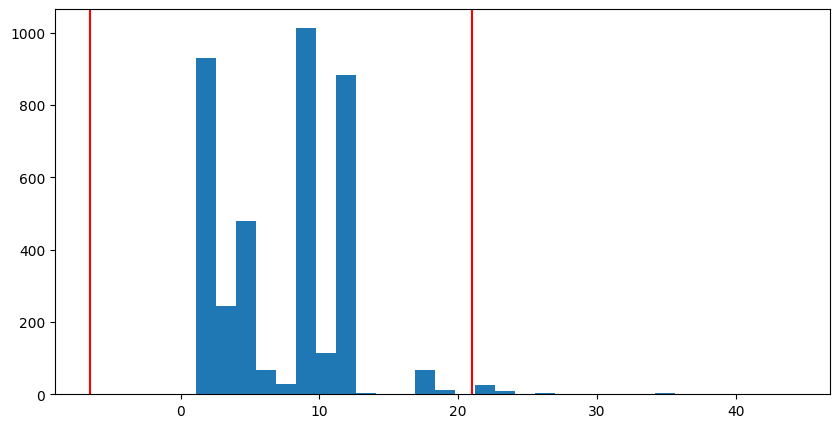

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(chipotle["item_price [$]"], bins=30)

plt.axvline(upper_lim, color='r')
plt.axvline(lower_lim, color="r")
plt.show()

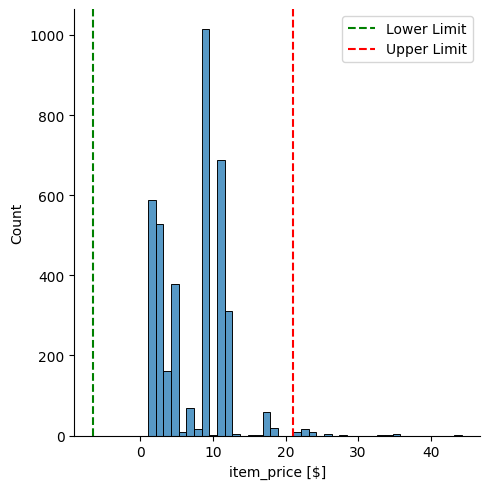

In [19]:
import seaborn as sns
sns.displot(chipotle["item_price [$]"])
plt.axvline(lower_lim, color="green", linestyle="--", label="Lower Limit")
plt.axvline(upper_lim, color="red", linestyle="--", label="Upper Limit")
plt.legend()

In [4]:
# pay attention to missing data!
# chipotle[~mask]

Removing outliers with percentiles:

In [21]:
upper_lim = chipotle['item_price [$]'].quantile(.95)
lower_lim = chipotle['item_price [$]'].quantile(.05)

chipotle[(chipotle['item_price [$]'] < upper_lim) & (chipotle['item_price [$]'] > lower_lim) | chipotle['item_price [$]'].isna()]

,order_id,quantity,item_name,choice_description,item_price [$]
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
...,...,...,...,...,...
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",NaN
4616,1832,1,Chips and Guacamole,NaN,4.45
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",NaN


Limiting outliers instead of deleting - esp. important for small datasets (for large datasets, removing redundant information is not a problem).

In [22]:
upper_lim = chipotle['item_price [$]'].quantile(.99)
lower_lim = chipotle['item_price [$]'].quantile(.01)

chipotle.loc[(chipotle['item_price [$]'] > upper_lim), 'item_price [$]'] = upper_lim
chipotle.loc[(chipotle['item_price [$]'] < lower_lim), 'item_price [$]'] = lower_lim

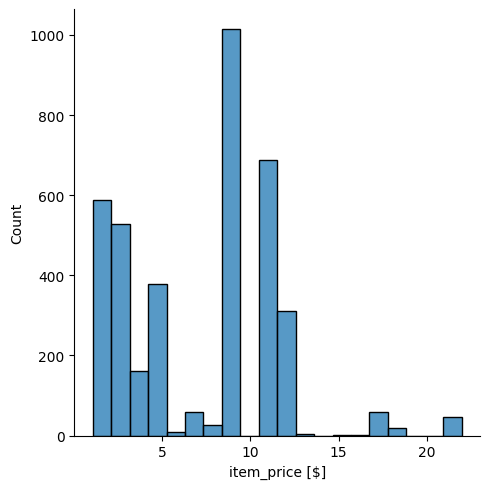

In [23]:
sns.displot(chipotle["item_price [$]"])

In [24]:
chipotle.shape

(4622, 5)

In [25]:
chipotle["item_price [$]"].describe()

,item_price [$]
count,3892.000000
mean,7.188625
std,4.432644
min,1.090000
25%,2.950000
50%,8.490000
75%,11.250000
max,21.960000


### Standardization

Standardization consists in standardizing the various data formats in a set:
* language coding style: UTF-8, ANSI etc.,
* Dates: Sep 12, 2019, Sep 12, 2019, 120919 etc.,
* New York City, NY, Z. New York,
* MIT, Massachusetts Institute of Technology
* Unrecognizable signs.


### Discretization

Continuous data distribution is bad for most machine learning algorithms.

<img src="https://drive.google.com/uc?export=view&id=1O8fuKpYz3hR2Ab6d7SOUZLrvQWqDzM55" alt="Data processing: discretization" title="Data processing: discretization" align="right" width="300px" hspace="20px" vspace="20px"/>

> numerical binning example

| Value  | Bin  |
| ------ | ---- |
| 0-30   | Low  |
| 31-70  | Mid  |
| 71-100 | High |

> categorical binning example

| Value  | Bin  |
| ------ | ---- |
| Spain  | Europe |
| Italy  | Europe |
| Chile  | South America |
| Brazil | South America |



### Logarithmic transformation

* helps to deal with skewed data
* organizes the size of the data
* reduces the impact of outliers
* increases the reliability of the model
* negative values need to be dealt with



<Axes: xlabel='item_price [$]', ylabel='Count'>

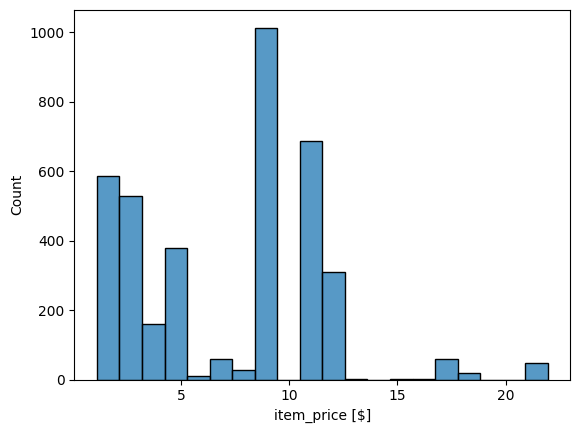

In [26]:
sns.histplot(chipotle["item_price [$]"])

<Axes: xlabel='item_price [$]', ylabel='Count'>

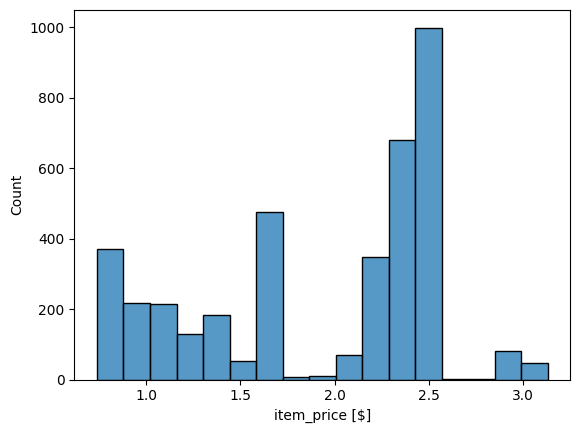

In [27]:
sns.histplot((chipotle['item_price [$]'] + 1).transform(np.log))

In [28]:
# if there are negative values present
(chipotle['item_price [$]'] - chipotle['item_price [$]'].min() + 1).transform(np.log)

,item_price [$]
0,0.832909
1,1.193922
2,1.193922
3,0.832909
4,2.826722
...,...
4617,2.456164
4618,2.456164
4619,2.412336
4620,NaN


### One-hot encoding (dummy variables)
n- 1 column, jesli obie kolumny 0 to Rzym

| User   | City     | → | User | Istanbul | Madrid |
| ------ | ----     | --- | --- | --- | --- |
| 1      | Roma     | → | 1 | 0 | 0 |
| 2      | Madrid   | → | 2 | 0 | 1 |
| 1      | Madrid   | → | 1 | 0 | 1 |
| 3      | Istanbul | → | 3 | 1 | 0 |
| 2      | Istanbul | → | 2 | 1 | 0 |
| 1      | Istanbul | → | 1 | 1 | 0 |
| 1      | Roma     | → | 1 | 0 | 0 |



In [29]:
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price [$]
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [30]:
chipotle_10 = chipotle.head(10)
pd.get_dummies(chipotle_10["item_name"], drop_first=True).astype(int)

,Chips and Fresh Tomato Salsa,Chips and Tomatillo-Green Chili Salsa,Izze,Nantucket Nectar,Side of Chips,Steak Burrito,Steak Soft Tacos
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0
7,0,0,0,0,0,1,0
8,0,0,0,0,0,0,1
9,0,0,0,0,0,1,0


### GroupBy & apply

<img src="https://drive.google.com/uc?export=view&id=17TC0l9R_fE2-d932J6YILBCUu8pj_ox7" alt="Data processing: groupby" title="Data processing: groupby" align="left" width="600px" hspace="20px" vspace="20px"/>

In [31]:
chipotle.groupby('item_name').sum()[['quantity', 'item_price [$]']].reset_index().sort_values(by="quantity", ascending=False)

,item_name,quantity,item_price [$]
17,Chicken Bowl,761,4587.09
18,Chicken Burrito,591,3528.66
25,Chips and Guacamole,506,2201.04
39,Steak Burrito,386,3836.91
10,Canned Soft Drink,351,438.75
23,Chips,230,494.34
38,Steak Bowl,221,2249.92
6,Bottled Water,211,302.56
24,Chips and Fresh Tomato Salsa,130,339.07
9,Canned Soda,126,137.34


### Split text

Useful when you have multiple traits in one column.

In [32]:
chipotle['item_name'].str.split(' ').map(lambda x: x[0])

,item_name
0,Chips
1,Izze
2,Nantucket
3,Chips
4,Chicken
...,...
4617,Steak
4618,Steak
4619,Chicken
4620,Chicken


In [33]:
chipotle[chipotle['item_name'].str.startswith('Chicken')]['item_name'].value_counts()

,count
item_name,
Chicken Bowl,726
Chicken Burrito,553
Chicken Soft Tacos,115
Chicken Salad Bowl,110
Chicken Crispy Tacos,47
Chicken Salad,9


In [34]:
chipotle[chipotle['item_name'].str.startswith('Chicken')]['item_name'].value_counts(normalize=True)

,proportion
item_name,
Chicken Bowl,0.465385
Chicken Burrito,0.354487
Chicken Soft Tacos,0.073718
Chicken Salad Bowl,0.070513
Chicken Crispy Tacos,0.030128
Chicken Salad,0.005769


### Scaling

In most cases, the numerical characteristics of a dataset are not specific and vary from one another. In fact, it doesn't make sense to expect the age and income columns to have the same range. But from a machine learning perspective, the same scope helps improve the model.

Scaling solves this problem. Continuous functions become range identical after the scaling process. This process is not mandatory for many algorithms, but still worthwhile. However, distance-based algorithms such as k-NN or k-Means must have scaled continuous functions as model inputs.
Basically, there are two common ways to scale: normalization and standardization.






In [35]:
chipotle['item_price [$]'].describe()

,item_price [$]
count,3892.000000
mean,7.188625
std,4.432644
min,1.090000
25%,2.950000
50%,8.490000
75%,11.250000
max,21.960000


In [36]:
# normalization (od 0 do 1) dobre dla procentow

item_price_normalized = (chipotle['item_price [$]'] - chipotle['item_price [$]'].min()) / \
(chipotle['item_price [$]'].max() - chipotle['item_price [$]'].min())

In [37]:
item_price_normalized.describe()

,item_price [$]
count,3892.000000
mean,0.292220
std,0.212393
min,0.000000
25%,0.089123
50%,0.354576
75%,0.486823
max,1.000000


In [38]:
# standardization

item_price_standardized = (chipotle['item_price [$]'] - chipotle['item_price [$]'].mean()) / \
chipotle['item_price [$]'].std()

In [39]:
item_price_standardized

,item_price [$]
0,-1.082565
1,-0.856966
2,-0.856966
3,-1.082565
4,2.208924
...,...
4617,1.029042
4618,1.029042
4619,0.916242
4620,NaN


In [40]:
item_price_standardized.describe()

,item_price [$]
count,3.892000e+03
mean,-2.752166e-16
std,1.000000e+00
min,-1.375844e+00
25%,-9.562297e-01
50%,2.935888e-01
75%,9.162421e-01
max,3.332408e+00


## **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Generate three boxplots on a single graph for `item_price` column values from a given dataset before and after scaling in two versions (normalization/standardization).

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


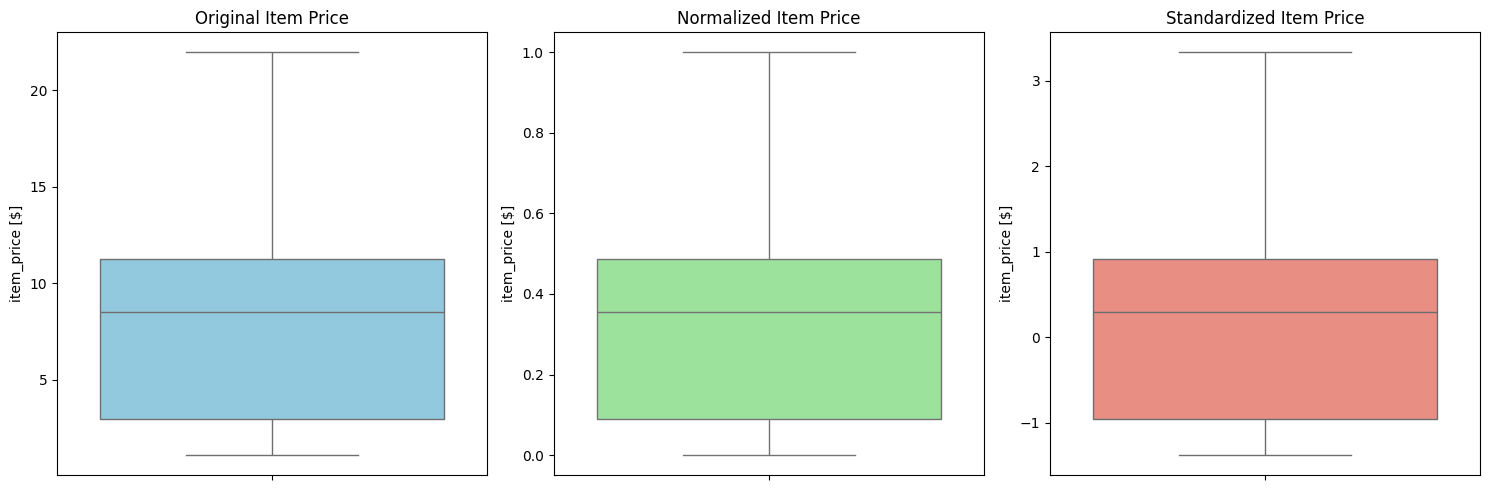

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=chipotle["item_price [$]"], ax=ax[0], color="skyblue")
ax[0].set_title("Original Item Price")

sns.boxplot(data=item_price_normalized, ax=ax[1], color="lightgreen")
ax[1].set_title("Normalized Item Price")

sns.boxplot(data=item_price_standardized, ax=ax[2], color="salmon")
ax[2].set_title("Standardized Item Price")

plt.tight_layout()
plt.show()

### Data extraction

In [42]:
from datetime import date

In [43]:
data = pd.DataFrame({
    'date': ['01-01-2017', '04-12-2008', '23-06-1988', '25-08-1999', '20-02-1993']
})

data

,date
0,01-01-2017
1,04-12-2008
2,23-06-1988
3,25-08-1999
4,20-02-1993


In [65]:
data['date'] = pd.to_datetime(data.date, format="%d-%m-%Y")

In [66]:
data['date'].dt.year

,date
0,2017
1,2008
2,1988
3,1999
4,1993


In [46]:
data['date'].dt.month

,date
0,1
1,12
2,6
3,8
4,2


In [47]:
data['date'].dt.day

,date
0,1
1,4
2,23
3,25
4,20


In [68]:
# default poniedzialek jako 0
data['date'].dt.day_of_week

,date
0,6
1,3
2,3
3,2
4,5


In [69]:
data['passed_years'] = date.today().year - data['date'].dt.year

In [50]:
data['passed_months'] = 12 * data['passed_years'] + date.today().month - data['date'].dt.month

In [51]:
data['day_name'] = data['date'].dt.day_name()

In [52]:
data

,date,passed_years,passed_months,day_name
0,2017-01-01,7,93,Sunday
1,2008-12-04,16,190,Thursday
2,1988-06-23,36,436,Thursday
3,1999-08-25,25,302,Wednesday
4,1993-02-20,31,380,Saturday


### Feature engineering example

How to assess whether a given profile on Facebook is not a bot?
* number of friends
* number of posts published
* number of photos
* number of likes
* likes under posts
* the length of the posts
* the origin of the phone number
* e-mail address domain

And the rating of the attractiveness of a movie on YouTube?



The car rental company ARRA wants to evaluate the reliability and maintenance costs of the different car models available in the fleet. It has the following data:
* a table with individual activities of all cars in the fleet: date, place of rental, status (driving, breakdown), renting data (age, sex, nationality), number of kilometers traveled, amount of fuel consumed, car identification number
* a table for each car: year of production, engine, equipment, brand, model, etc.


What features can we find here?






<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>
<br>

# TASKS

## **<font color='#306998'>Information for TASKs </font><font color='#ffd33b'>1-2</font>**

The following data was was made available on https://www.kaggle.com/datasets/davidbnn92/weather-data-for-covid19-data-analysis/.

Try downloading it from there using the `Download` button or with the API command `!kaggle datasets download -d davidbnn92/weather-data-for-covid19-data-analysis` (see https://www.kaggle.com/discussions/general/74235 for more details).

If the data is no longer available you can always download it from our Google Drive https://drive.google.com/drive/folders/1KXr6yUW7rE0LzUzuuMehEzam8D9zxGpv?usp=sharing.

### About Dataset

The dataset contains selected metereological features, such as temperature or wind speed, and was imported from the `NOAA GSOD dataset`, continuously updated to include recent measurments.

> Among others, you can find the following columns here:
* `Id`
* `Country/Region`
* `Date`
* `temp`: Mean temperature for the day in degrees Fahrenheit to tenths.
* `max`: Maximum temperature reported during the day.
* `min`: Minimum temperature reported during the day.
* `stp`: Mean station pressure for the day in millibars to tenths.
* `slp`: Mean sea level pressure for the day.
* `dewp`: Mean dew point for the day in [Fahrenheit to tenths].
* `wdsp`: Mean wind speed for the day in [knots to tenths].
* `prcp`: Total precipitation (rain and/or melted snow) reported during the day in [inches and hundredths]; `.00` indicates no measurable precipitation (includes a trace).
* `fog`: Indicators (1 = yes, 0 = no/not reported) for the occurrence during the day.</br></br>
Note that time of max/min temperatures varies by country and region, so this will sometimes not be the max for the calendar day.

## **<font color='#306998'>TASK </font><font color='#ffd33b'>1</font>**

Check how many rows contain missing data in `slp` column. Delete those rows and reset the rows indexes (see the `.reset_index()` method).


In [186]:
df_weather = pd.read_csv("/content/drive/MyDrive/SDA Data Science/files/training_data_with_weather_info_week_4.csv")

In [187]:
df_weather=df_weather[['Id','Country_Region','Date','temp','min','max','stp','slp','dewp','wdsp','prcp','fog']]

In [120]:
df_weather.head()

,Id,Country_Region,Date,temp,min,max,stp,slp,dewp,wdsp,prcp,fog
0,1,Afghanistan,2020-01-22,42.6,33.6,54.9,999.9,1024.3,27.4,9.4,0.00,0
1,2,Afghanistan,2020-01-23,42.0,32.7,55.9,999.9,1020.8,22.8,14.9,99.99,1
2,3,Afghanistan,2020-01-24,40.1,36.9,43.2,999.9,1018.6,34.5,10.4,0.17,1
3,4,Afghanistan,2020-01-25,46.0,37.9,56.3,999.9,1018.0,37.8,6.1,0.57,1
4,5,Afghanistan,2020-01-26,42.8,36.1,53.1,999.9,1014.8,33.2,10.8,0.00,1


In [99]:
df_weather.dtypes

,0
Id,int64
Country_Region,object
Date,object
temp,float64
min,float64
max,float64
stp,float64
slp,float64
dewp,float64
wdsp,float64


In [86]:
df_weather.isna().sum()

,0
Id,0
Country_Region,0
Date,0
temp,0
min,3
max,5
stp,0
slp,0
dewp,349
wdsp,0


In [85]:
df_weather.isna().mean()

,0
Id,0.000000
Country_Region,0.000000
Date,0.000000
temp,0.000000
min,0.000210
max,0.000349
stp,0.000000
slp,0.000000
dewp,0.024390
wdsp,0.000000


In [103]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14309 entries, 0 to 14308
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              14309 non-null  int64  
 1   Country_Region  14309 non-null  object 
 2   Date            14309 non-null  object 
 3   temp            14309 non-null  float64
 4   min             14306 non-null  float64
 5   max             14304 non-null  float64
 6   stp             14309 non-null  float64
 7   slp             14309 non-null  float64
 8   dewp            13960 non-null  float64
 9   wdsp            14309 non-null  float64
 10  prcp            14309 non-null  float64
 11  fog             14309 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.3+ MB


In [188]:
df_weather = df_weather[~df_weather["slp"].isnull()].reset_index()

In [189]:
df_weather = df_weather.drop('index', axis=1)

In [102]:
df_weather.head()

,Id,Country_Region,Date,temp,min,max,stp,slp,dewp,wdsp,prcp,fog
0,1,Afghanistan,2020-01-22,42.6,33.6,54.9,999.9,1024.3,27.4,9.4,0.00,0
1,2,Afghanistan,2020-01-23,42.0,32.7,55.9,999.9,1020.8,22.8,14.9,99.99,1
2,3,Afghanistan,2020-01-24,40.1,36.9,43.2,999.9,1018.6,34.5,10.4,0.17,1
3,4,Afghanistan,2020-01-25,46.0,37.9,56.3,999.9,1018.0,37.8,6.1,0.57,1
4,5,Afghanistan,2020-01-26,42.8,36.1,53.1,999.9,1014.8,33.2,10.8,0.00,1


## **<font color='#306998'>TASK </font><font color='#ffd33b'>2</font>**

For the data frame from **Task 1**:
* generate missing data by removing the randomly selected 10% of values and replacing them with `-99` (e.g. use the following command `df_weather = df_weather.mask(np.random.random(df.shape) < .1)`)
* fill in the missing data with the
    * mean value
    * median value
    * mean value wrt. to Country (groupby first to get mean values)
* remove outlier observations
* enter a new column with discrete values for temperature (you can use the `cut()` or `qcut()` methods from the `pandas` library)
* enter the so-called *dummy variables* for those discrete temperature values
* use normalization or standardization to scale the temperature data
* create an additional `date` column containing the date in `pd.DateTime()` format

Tips:
* the missing data in the form `-99` can be replaced with something standard, e.g. `df_weather = df_weather.replace(-99, np.NaN)` then all standard methods such as: `.isna(), .isnull(), .fillna(), .dropna()` can be used
* to generate dummy variables, the so-called one-hot-encoding can be used:
    * `pd.get_dummies()` from pandas
    * `sklearn.preprocessing.OneHotEncoder` from scikit-learn
    * `tf.keras.layers.CategoryEncoding` from tensorflow
* data scaling can be done as in the slides or with the scikit-learn library, such as `sklearn.preprocessing.StandardScaler` or `sklearn.preprocessing.MinMaxScaler`


In [59]:
import numpy as np

In [190]:
df_weather = df_weather.mask(np.random.random(df_weather.shape) < .1)

In [201]:
df_weather.isna().sum()

,0
Id,1332
Country_Region,0
Date,1301
temp,0
min,1326
max,1412
stp,1279
slp,1321
dewp,1493
wdsp,1366


In [106]:
df_weather["Country_Region"].unique()

array(['Afghanistan', nan, 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belize',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Burkina Faso', 'Burma', 'Cabo Verde', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Egypt',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gambia', 'Ghana', 'Greece',
       'Grenada', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
       'Korea, South', 'Kuwait', 'Laos', 'Latvia', 'Lebanon', 'Liberia',
       'Libya', 'Liechtenstein', 'Luxembourg', 'MS Zaandam', 'Malaysia',

In [154]:
df_weather["temp"] = df_weather["temp"].fillna(df_weather["temp"].median())

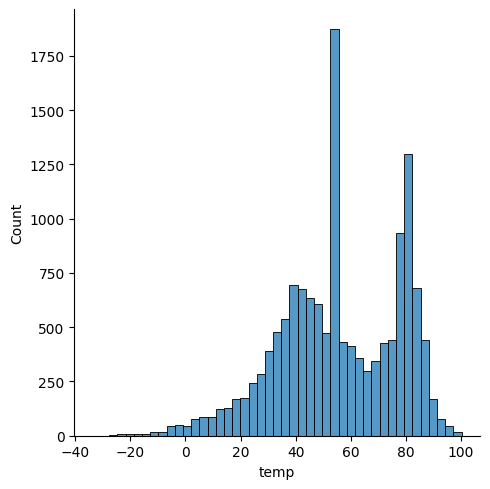

In [155]:
import seaborn as sns

sns.displot(df_weather["temp"])

In [127]:
df_weather["temp"] = df_weather["temp"].fillna(df_weather["temp"].mean())

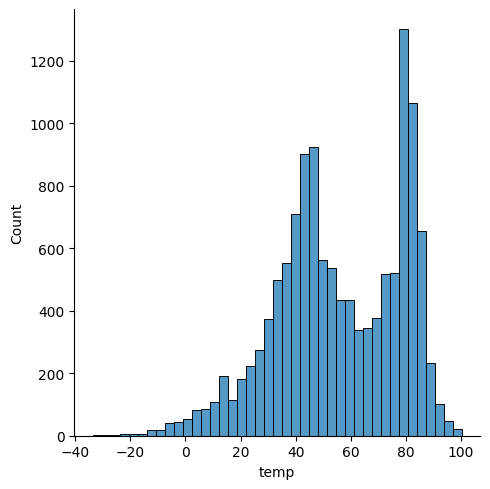

In [192]:
country_temp_mean = df_weather[["Country_Region", "temp"]].groupby("Country_Region").mean()
country_temp_mean.reset_index(inplace = True)
df_weather = pd.merge(df_weather, country_temp_mean, on="Country_Region", suffixes=["", "_country_mean"])
df_weather["temp"] = df_weather["temp"].fillna(df_weather["temp_country_mean"])
sns.displot(df_weather["temp"])

In [ ]:
df_weather["temp"].fillna(df_weather.groupby("Country_Region"))['temp'].transform('mean')

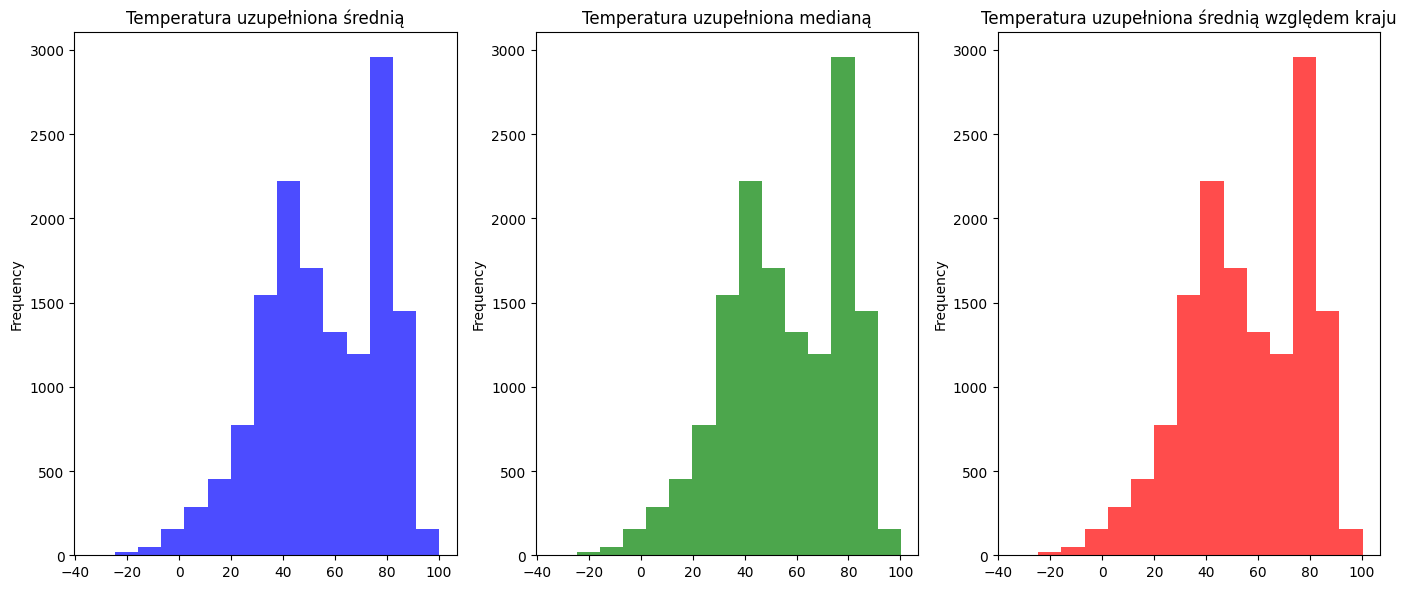

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = df_weather
df['Temperature_filled_mean'] = df['temp'].fillna(df['temp'].mean())
df['Temperature_filled_median'] = df['temp'].fillna(df['temp'].median())
df['Temperature_filled_country_mean'] = df.groupby('Country_Region')['temp'].transform(lambda x: x.fillna(x.mean()))
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
df['Temperature_filled_mean'].plot(kind='hist', bins=15, alpha=0.7, label='Średnia', color='blue')
plt.title('Temperatura uzupełniona średnią')
plt.subplot(1, 3, 2)
df['Temperature_filled_median'].plot(kind='hist', bins=15, alpha=0.7, label='Mediana', color='green')
plt.title('Temperatura uzupełniona medianą')
plt.subplot(1, 3, 3)
df['Temperature_filled_country_mean'].plot(kind='hist', bins=15, alpha=0.7, label='Średnia wg kraju', color='red')
plt.title('Temperatura uzupełniona średnią względem kraju')
plt.tight_layout()
plt.show()

In [193]:
def plot_hist_temp(column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df_weather[column_name], kde=True, bins=20, color="skyblue")
    plt.xlabel("Temperature °F", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True)
    plt.show()

In [200]:
df_weather.drop(columns=["temp_country_mean"], inplace=True)

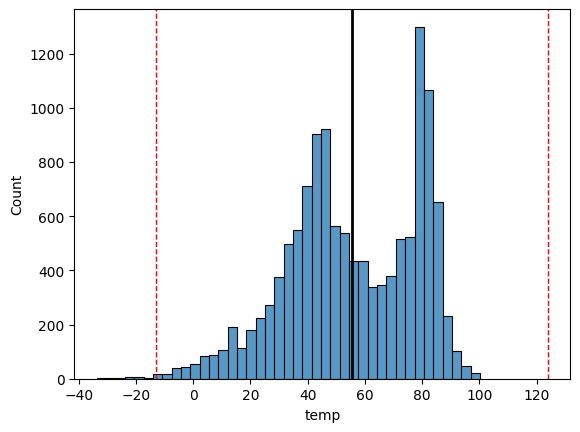

In [209]:
# regula 3 sigm
ax=sns.histplot(data=df_weather, x="temp")
ax.axvline(x=df_weather["temp"].mean(), color="k", lw=2)
ax.axvline(x=df_weather["temp"].mean()+ df_weather["temp"].std()*3, color="r", lw=1, ls="--")
ax.axvline(x=df_weather["temp"].mean()- df_weather["temp"].std()*3, color="r", lw=1, ls="--")

In [210]:
factor = 3
temp_mean = df_weather["temp"].mean()
temp_std = df_weather["temp"].std()

upper_lim = temp_mean + temp_std * factor
lower_lim = temp_mean - temp_std * factor

In [211]:
upper_lim

123.94831703458826

In [212]:
lower_lim

-12.981579407963856

In [213]:
mask = ((df_weather["temp"] < upper_lim) & (df_weather["temp"] > lower_lim)) | (df_weather["temp"].isnull())

In [216]:
df_weather = df_weather[mask]

In [217]:
df_weather.shape

(12874, 12)

enter a new column with discrete values for temperature (you can use the cut() or qcut() methods from the pandas library)

enter the so-called dummy variables for those discrete temperature values

In [ ]:
# ze zmiennej ciaglej temperatury tworzymy zmienna dyskretna (uzyj funkcji cut() lub qcut())

In [230]:
df_weather["temp_discrete"] = pd.cut(df_weather["temp"], bins=5)
dummy_variables = pd.get_dummies(df_weather["temp_discrete"], drop_first=True, prefix="temp").astype(int)

In [229]:
df_weather["temp_discrete"].value_counts()

,count
temp_discrete,
"(32.34, 54.96]",4608
"(77.58, 100.2]",3367
"(54.96, 77.58]",2983
"(9.72, 32.34]",1553
"(-13.013, 9.72]",363


use normalization or standardization to scale the temperature data

In [232]:
#normalizacja
temp_normalized=(df_weather['temp']-df_weather['temp'].min())/(df_weather['temp'].max()-df_weather['temp'].min())

In [233]:
temp_normalized.describe()

,temp
count,12874.000000
mean,0.606016
std,0.199687
min,0.000000
25%,0.465959
50%,0.592396
75%,0.804598
max,1.000000


In [234]:
temp_standardized=(df_weather['temp']-df_weather['temp'].mean())/df_weather['temp'].std()

In [235]:
temp_standardized.describe()

,temp
count,1.287400e+04
mean,-7.947658e-17
std,1.000000e+00
min,-3.034824e+00
25%,-7.013810e-01
50%,-6.820777e-02
75%,9.944607e-01
max,1.973001e+00


In [256]:
df_weather["date"] = pd.to_datetime(df_weather["Date"])

In [266]:
df_weather.dtypes

,0
Id,float64
Country_Region,object
Date,object
temp,float64
min,float64
max,float64
stp,float64
slp,float64
dewp,float64
wdsp,float64


In [238]:
df_weather["date"].dt.year

,date
0,2020.0
1,2020.0
2,2020.0
3,2020.0
4,2020.0
...,...
12896,2020.0
12897,2020.0
12898,2020.0
12899,2020.0


In [239]:
df_weather["date"].dt.month

,date
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
12896,4.0
12897,4.0
12898,4.0
12899,4.0


In [241]:
df_weather["date"].dt.day_name()

,date
0,Wednesday
1,Thursday
2,Friday
3,Sunday
4,Monday
...,...
12896,Saturday
12897,Sunday
12898,Monday
12899,Tuesday


In [246]:
(pd.to_datetime('now') - df_weather['date']).dt.days//365

,date
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0
...,...
12896,4.0
12897,4.0
12898,4.0
12899,4.0


In [270]:
def seasons(data):
  try:
    if data.strftime('%m-%d') < '03-21':
      result = "winter"
    elif data.strftime('%m-%d') < '06-22':
      result = "spring"
    elif data.strftime('%m-%d') < '09-23':
      result = "summer"
    elif data.strftime('%m-%d') < '12-21':
      result = "autumn"
    else:
      result = "winter"
  except:
    result = np.nan
  return result

In [272]:
df_weather['seasons'] = df_weather['date'].apply(seasons)

In [273]:
df_weather

,Id,Country_Region,Date,temp,min,max,stp,slp,dewp,wdsp,prcp,fog,temp_discrete,date,seansons,seasons
0,1.0,Afghanistan,2020-01-22,42.60,33.6,54.9,999.9,1024.3,27.4,9.4,0.00,0.0,"(32.34, 54.96]",2020-01-22,NaN,winter
1,2.0,Afghanistan,2020-01-23,42.00,32.7,55.9,999.9,1020.8,22.8,14.9,99.99,1.0,"(32.34, 54.96]",2020-01-23,NaN,winter
2,3.0,Afghanistan,2020-01-24,40.10,36.9,43.2,999.9,1018.6,34.5,10.4,0.17,1.0,"(32.34, 54.96]",2020-01-24,NaN,winter
3,NaN,Afghanistan,2020-01-26,42.80,36.1,53.1,999.9,1014.8,33.2,10.8,0.00,1.0,"(32.34, 54.96]",2020-01-26,NaN,winter
4,NaN,Afghanistan,2020-01-27,35.16,36.5,50.7,999.9,1015.7,35.6,3.7,0.04,0.0,"(32.34, 54.96]",2020-01-27,NaN,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12896,35072.0,Venezuela,2020-04-04,83.50,78.1,91.4,3.4,1009.9,72.0,4.2,0.28,1.0,"(77.58, 100.2]",2020-04-04,NaN,spring
12897,35073.0,Venezuela,2020-04-05,83.50,78.1,91.4,3.4,1009.9,72.0,4.2,0.28,1.0,"(77.58, 100.2]",2020-04-05,NaN,spring
12898,35074.0,Venezuela,2020-04-06,83.50,78.1,91.4,3.4,1009.9,72.0,4.2,0.28,NaN,"(77.58, 100.2]",2020-04-06,NaN,spring
12899,NaN,Venezuela,2020-04-07,83.50,78.1,91.4,3.4,1009.9,72.0,4.2,0.28,1.0,"(77.58, 100.2]",2020-04-07,NaN,spring
